In [12]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import math

import streamlit as st

import textwrap

from fer import FER


# Face Detection

## Harr Cascade

In [2]:
# Here we are importing the already trained HaarCascade models
facial_cascade_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade_classifier = cv2.CascadeClassifier("haarcascade_eye.xml")

In [3]:
def testDevice(source):
    cap = cv2.VideoCapture(source) 
    if cap is None or not cap.isOpened():
        print('Warning: unable to open video source: ', source)

testDevice(0) # no printout
testDevice(1) # prints message

In [4]:
def draw_label(img, text, shape, bg_color):
    font = cv2.FONT_ITALIC
    font_size = 0.8
    color = (0, 0, 0)
    font_thickness = 1
    margin = 5
        

#     txt_size = cv2.getTextSize(text, font_face, scale, thickness)

#     pos_a = math.floor((shape[1] - txt_size[0][0])/2)
#     pos_b = 70
    
#     end_x = pos_a + txt_size[0][0] + margin
#     end_y = pos_b - txt_size[0][1] - margin
    
    wrapped_text = textwrap.wrap(text, width=60)
    
    for i, line in enumerate(wrapped_text):
        
        textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
        
        gap = textsize[1] + 10
        
        x = int((img.shape[1] - textsize[0]) / 2) 
        y = int((img.shape[0] + textsize[1]) / 2) + i * gap - 180
        
        end_x = x + textsize[0] + margin
        end_y = y - textsize[1] - margin 
        
        cv2.rectangle(img, (x, y), (end_x, end_y), bg_color, cv2.FILLED)

        cv2.putText(img, line, (x, y), font,
                    font_size, 
                    color, 
                    font_thickness, 
                    cv2.LINE_AA)
    
    #cv2.rectangle(img, (pos_a, pos_b), (end_x, end_y), bg_color, thickness)
    #cv2.putText(img, text, (pos_a, pos_b), font_face, scale, color, 1, cv2.LINE_AA)
    
    return textsize

In [5]:
def draw_warning(img, text, shape, bg_color):
    font = cv2.FONT_HERSHEY_COMPLEX
    font_size = 1
    color = (0, 0, 255)
    font_thickness = 2
    margin = 5
    
    wrapped_text = textwrap.wrap(text, width=60)
    
    for i, line in enumerate(wrapped_text):
        
        textsize = cv2.getTextSize(line, font, font_size, font_thickness)[0]
        
        gap = textsize[1] + 10
        
        x = int((img.shape[1] - textsize[0]) / 2) 
        y = int((img.shape[0] + textsize[1]) / 2) + i * gap
        
        end_x = x + textsize[0] + margin
        end_y = y - textsize[1] - margin 
        
        #cv2.rectangle(img, (x, y), (end_x, end_y), bg_color, cv2.FILLED)

        cv2.putText(img, line, (x, y), font,
                    font_size, 
                    color, 
                    font_thickness, 
                    cv2.LINE_AA)
    
    #cv2.rectangle(img, (pos_a, pos_b), (end_x, end_y), bg_color, thickness)
    #cv2.putText(img, text, (pos_a, pos_b), font_face, scale, color, 1, cv2.LINE_AA)
    
    return textsize

In [6]:
questions = [
    
    "Please introduce and give us a brief background of yourself",
    
    "What really motivates you to work?",
    
    "Tell us a situation where you really had to and compromise in your workplace. Please elaborate but be concise.",
    
    "Was there a time where you had to step up in leadership?"
    
]

In [7]:
detector = FER()

2021-06-14 10:59:57.958 WARNING tensorflow: From C:\Users\jc17642\Anaconda3\envs\stat8021\lib\site-packages\tensorflow\python\keras\layers\normalization.py:534: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
C:\Users\jc17642\Anaconda3\envs\stat8021\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [10]:
video_capture = cv2.VideoCapture(0)

# set video resolution
video_capture.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
video_capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)

i = 0

while True:
    # Capture frame-by-frame
    # frame as image 
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = facial_cascade_classifier.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=8,
        minSize=(100, 100),
        flags=cv2.cv2.CASCADE_SCALE_IMAGE
    )
    
    # if no faces detected
    if len(faces) == 0:
        _ = draw_warning(frame, "No face detected, please re-adjust position.", frame.shape, (255,255,255))
    else:
        try:
            
            # Draw a rectangle around the faces
            for (x, y, w, h) in faces:
                emotion = detector.top_emotion(frame)
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

                emotion_text = emotion[0] + ': ' + str(emotion[1]*100) + '%'

                cv2.putText(frame, emotion_text, (x - 20, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        except:
            _ = draw_warning(frame, "No face detected, please re-adjust position.", frame.shape, (255,255,255))

    # draw the label into the frame
    #txt_size=draw_label(frame, questions[i], frame.shape, (255,255,255))

    # Display the resulting frame
    cv2.imshow('Video', frame)

#     if cv2.waitKey(1) & 0xFF == ord(' '):
#         if i+1 == len(questions):
#             break
#         i = i + 1
        
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        


# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

In [15]:
?FER

In [18]:
params = detector.top_emotion(frame);params

('angry', 0.52)

In [16]:
len(faces)

1

In [19]:
?FER

In [29]:
for f in faces:
    for a,b,c,d in f:
        print(a,b,c,d)

TypeError: 'numpy.intc' object is not iterable

In [31]:
f.reshape(1, 4)

array([[280, 207, 201, 201]], dtype=int32)

In [33]:
for (a, b, c, d) in np.array(params[0]['box']).reshape(1,4):
    print(a,b,c,d)

297 172 192 192


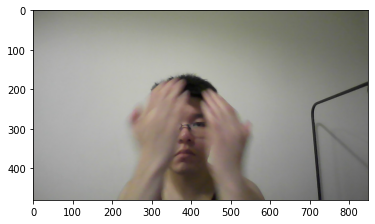

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

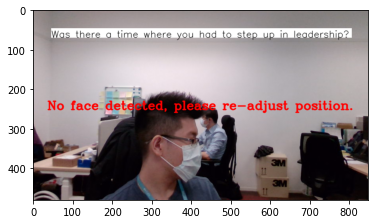

In [133]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Future Plans

* streamlit add button for next question
* different tabs for different parts 

In [72]:
frame.shape

(480, 848, 3)

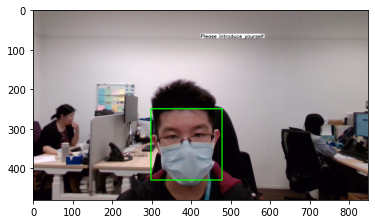

In [47]:
# RGB to BGR
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

In [15]:
jason = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

In [16]:
plt.imsave('jason.jpg', jason)

## `face_recognition`

In [18]:
import face_recognition

In [19]:
# This is a demo of running face recognition on live video from your webcam. It's a little more complicated than the
# other example, but it includes some basic performance tweaks to make things run a lot faster:
#   1. Process each video frame at 1/4 resolution (though still display it at full resolution)
#   2. Only detect faces in every other frame of video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(2)

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("jason.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("asian.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Jason",
    "Sample"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

In [56]:
obama_face_encoding[0]

-0.13528594374656677

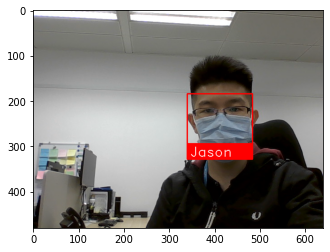

In [62]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

In [63]:
jason_detect = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

In [64]:
plt.imsave('jason_detect.jpg', jason_detect)